In [49]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor,AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR,LinearSVR,NuSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional, GRU, LSTM, RepeatVector, TimeDistributed,Conv1D,MaxPooling1D,ReLU,UpSampling1D,Input,LeakyReLU
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from keras.layers.core import Dense
from keras.layers.merge import concatenate
from tensorflow.keras.layers import Average
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
import pywt
from scipy.fft import fft,ifft

In [50]:
data = pd.read_csv('train_FD001.txt', sep = ' ', header = None)
print(data.head)
data.columns

<bound method NDFrame.head of         0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     2

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

In [51]:
data_act = data[[f for f in range(0, 26)]]
data_act.columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]
unique_opset1 = np.unique(data_act['OpSet1'])
unique_opset1 = unique_opset1.tolist()
unique_opset2 = np.unique(data_act['OpSet2'])
unique_opset2 = unique_opset2.tolist()
print(type(unique_opset1))
print(unique_opset1)
print(type(unique_opset2))
print(unique_opset2)

<class 'list'>
[-0.0087, -0.0086, -0.0084, -0.0081, -0.0078, -0.0075, -0.0074, -0.0073, -0.0072, -0.007, -0.0069, -0.0068, -0.0067, -0.0066, -0.0065, -0.0064, -0.0063, -0.0062, -0.0061, -0.006, -0.0059, -0.0058, -0.0057, -0.0056, -0.0055, -0.0054, -0.0053, -0.0052, -0.0051, -0.005, -0.0049, -0.0048, -0.0047, -0.0046, -0.0045, -0.0044, -0.0043, -0.0042, -0.0041, -0.004, -0.0039, -0.0038, -0.0037, -0.0036, -0.0035, -0.0034, -0.0033, -0.0032, -0.0031, -0.003, -0.0029, -0.0028, -0.0027, -0.0026, -0.0025, -0.0024, -0.0023, -0.0022, -0.0021, -0.002, -0.0019, -0.0018, -0.0017, -0.0016, -0.0015, -0.0014, -0.0013, -0.0012, -0.0011, -0.001, -0.0009, -0.0008, -0.0007, -0.0006, -0.0005, -0.0004, -0.0003, -0.0002, -0.0001, -0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032, 0.0033, 0.0034, 0.003

In [52]:
data_act_dummy_id = pd.get_dummies(data_act['ID'], prefix = 'ID')
data_act_dummy_optset1 = pd.get_dummies(data_act['OpSet1'], prefix = 'OpSet1')
data_act_dummy_optset2 = pd.get_dummies(data_act['OpSet2'], prefix = 'OpSet2')

In [53]:
data_act_dummy_id.head(5)

,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,ID_10,...,ID_91,ID_92,ID_93,ID_94,ID_95,ID_96,ID_97,ID_98,ID_99,ID_100
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
data_act_dummy_optset1.head(5)

,OpSet1_-0.0087,OpSet1_-0.0086,OpSet1_-0.0084,OpSet1_-0.0081,OpSet1_-0.0078,OpSet1_-0.0075,OpSet1_-0.0074,OpSet1_-0.0073,OpSet1_-0.0072,OpSet1_-0.007,...,OpSet1_0.0069,OpSet1_0.007,OpSet1_0.0071,OpSet1_0.0072,OpSet1_0.0073,OpSet1_0.0074,OpSet1_0.0076,OpSet1_0.0077,OpSet1_0.0083,OpSet1_0.0087
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
data_act_dummy_optset2.head(5)

,OpSet2_-0.0006,OpSet2_-0.0005,OpSet2_-0.0004,OpSet2_-0.0003,OpSet2_-0.0002,OpSet2_-0.0001,OpSet2_0.0,OpSet2_0.0001,OpSet2_0.0002,OpSet2_0.0003,OpSet2_0.0004,OpSet2_0.0005,OpSet2_0.0006
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0


In [56]:
data_act_df = pd.concat([data_act,data_act_dummy_id, data_act_dummy_optset1,data_act_dummy_optset2], axis = 1)

In [57]:
data_act_df.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,OpSet2_-0.0003,OpSet2_-0.0002,OpSet2_-0.0001,OpSet2_0.0,OpSet2_0.0001,OpSet2_0.0002,OpSet2_0.0003,OpSet2_0.0004,OpSet2_0.0005,OpSet2_0.0006
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,1,0,0,0,0,0,0,0,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0,0,0,0,0,0,1,0,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0,0,0,1,0,0,0,0,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0,1,0,0,0,0,0,0,0,0


In [58]:
data_act_df.columns

Index(['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1',
       'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5',
       ...
       'OpSet2_-0.0003', 'OpSet2_-0.0002', 'OpSet2_-0.0001', 'OpSet2_0.0',
       'OpSet2_0.0001', 'OpSet2_0.0002', 'OpSet2_0.0003', 'OpSet2_0.0004',
       'OpSet2_0.0005', 'OpSet2_0.0006'],
      dtype='object', length=297)

In [59]:
data_act_df.drop(['OpSet1', 'OpSet2', 'OpSet3'], axis = 1, inplace = True)


In [60]:
data_act_df.columns

Index(['ID', 'Cycle', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3',
       'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7',
       'SensorMeasure8',
       ...
       'OpSet2_-0.0003', 'OpSet2_-0.0002', 'OpSet2_-0.0001', 'OpSet2_0.0',
       'OpSet2_0.0001', 'OpSet2_0.0002', 'OpSet2_0.0003', 'OpSet2_0.0004',
       'OpSet2_0.0005', 'OpSet2_0.0006'],
      dtype='object', length=294)

In [61]:
max_cycles_df = data_act_df.groupby(["ID"], sort=False)["Cycle"].max().reset_index().rename(columns={"Cycle" : "MaxCycleID"})
max_cycles_df.head(20)

,ID,MaxCycleID
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
5,6,188
6,7,259
7,8,150
8,9,201
9,10,222


In [62]:
FD001_df = pd.merge(data_act_df, max_cycles_df, how="inner", on="ID")
FD001_df["RUL"] = FD001_df["MaxCycleID"] - FD001_df["Cycle"]
FD001_df

,ID,Cycle,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,...,OpSet2_-0.0001,OpSet2_0.0,OpSet2_0.0001,OpSet2_0.0002,OpSet2_0.0003,OpSet2_0.0004,OpSet2_0.0005,OpSet2_0.0006,MaxCycleID,RUL
0,1,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,...,0,0,0,0,0,0,0,0,192,191
1,1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,...,0,0,0,0,0,0,0,0,192,190
2,1,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,...,0,0,0,0,1,0,0,0,192,189
3,1,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,...,0,1,0,0,0,0,0,0,192,188
4,1,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,...,0,0,0,0,0,0,0,0,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,...,0,0,0,0,0,0,0,0,200,4
20627,100,197,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,...,0,0,0,0,0,0,0,0,200,3
20628,100,198,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,...,0,1,0,0,0,0,0,0,200,2
20629,100,199,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,...,0,0,0,0,1,0,0,0,200,1


In [76]:
df_FD001 = FD001_df.copy().drop(columns=["ID", "Cycle", "MaxCycleID", "RUL"], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
# print(df_FD001)
scaled_df_FD001 = pd.DataFrame(scaler.fit_transform(df_FD001.values))
scaled_df_FD001 = FD001_df[["ID", "Cycle", "RUL"]].join(scaled_df_FD001)
col_list = FD001_df.columns
col_list.tolist()
col_list_1 = ['ID', 'Cycle', 'RUL']
col_list_2 = [col for col in col_list if col not in col_list_1]
col_list_ = col_list_1 + col_list_2
col_list_.remove('MaxCycleID')
len(col_list_)
scaled_df_FD001.columns = col_list_
scaled_df_FD001

,ID,Cycle,RUL,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,...,OpSet2_-0.0003,OpSet2_-0.0002,OpSet2_-0.0001,OpSet2_0.0,OpSet2_0.0001,OpSet2_0.0002,OpSet2_0.0003,OpSet2_0.0004,OpSet2_0.0005,OpSet2_0.0006
0,1,1,191,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,190,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,189,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,4,188,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,187,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,4,0.0,0.686747,0.587312,0.782917,0.0,1.0,0.254428,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20627,100,197,3,0.0,0.701807,0.729453,0.866475,0.0,1.0,0.162641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20628,100,198,2,0.0,0.665663,0.684979,0.775321,0.0,1.0,0.175523,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20629,100,199,1,0.0,0.608434,0.746021,0.747468,0.0,1.0,0.133655,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


/Users/shivam.bhardwaj/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


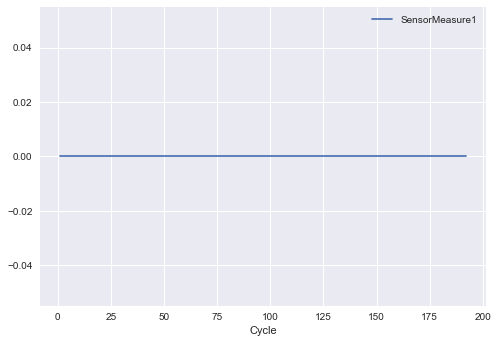

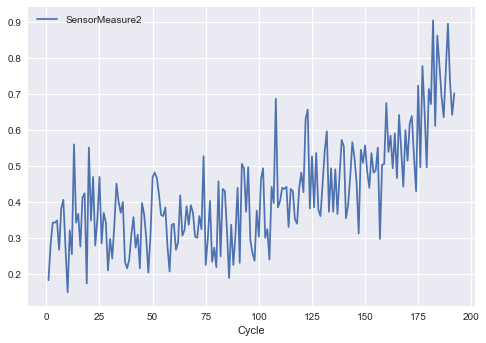

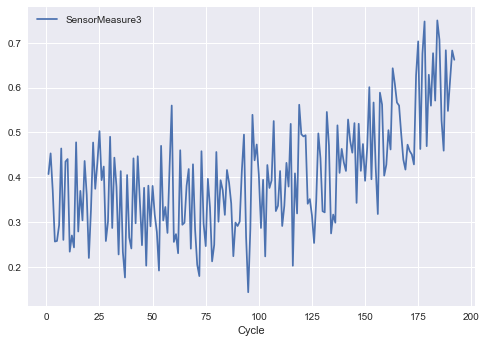

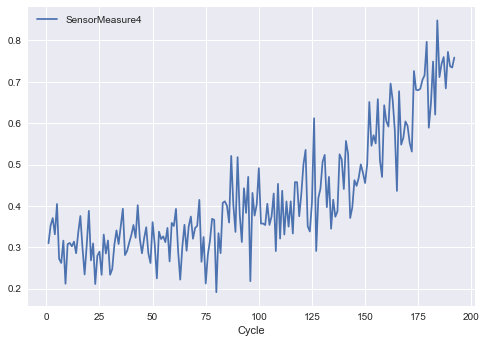

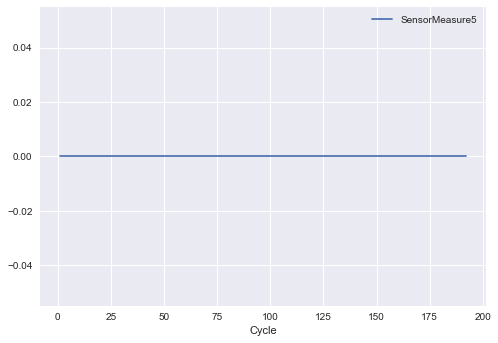

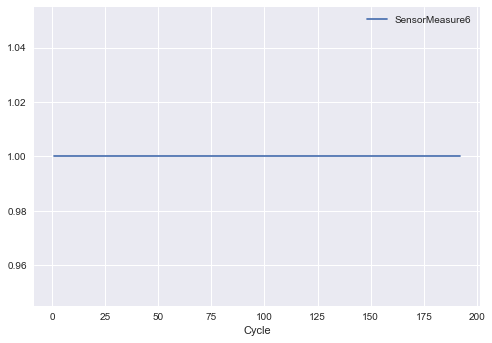

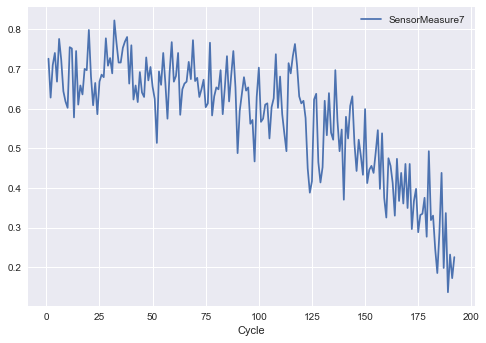

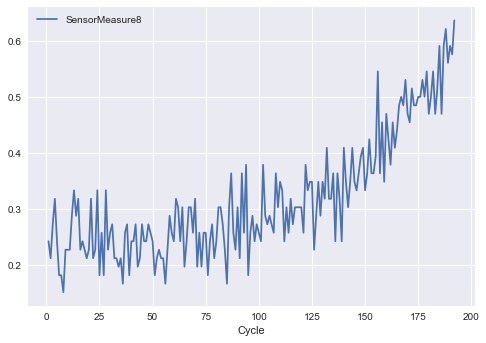

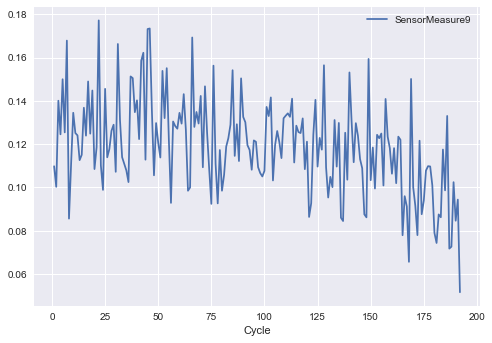

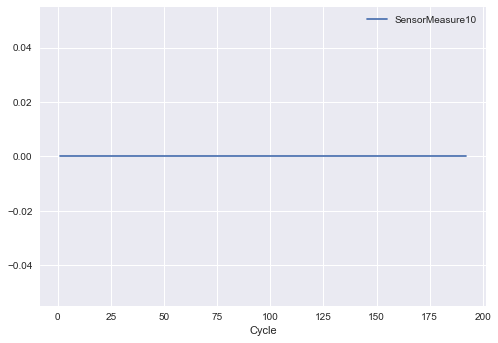

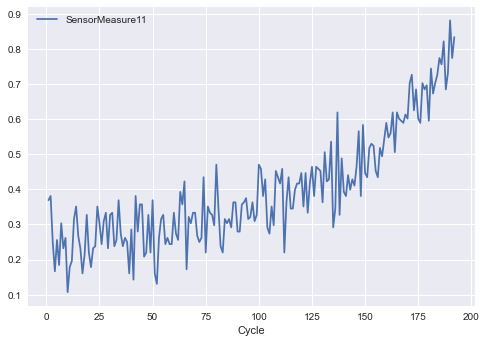

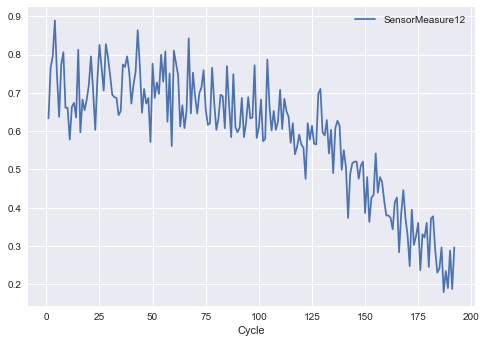

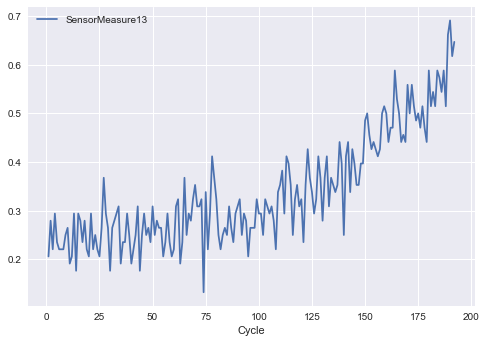

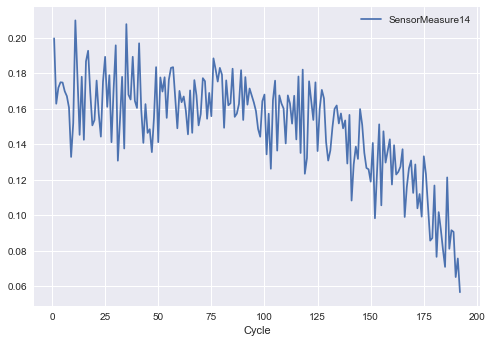

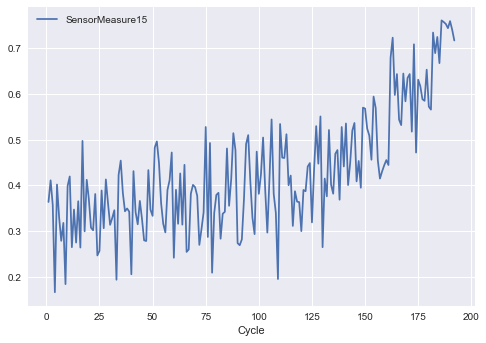

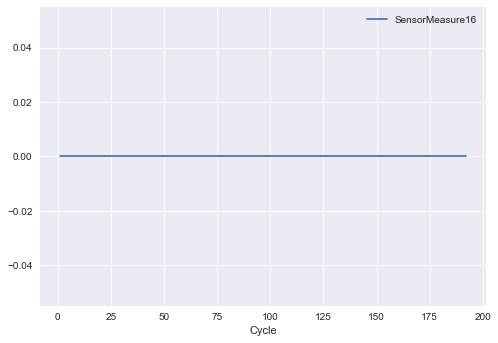

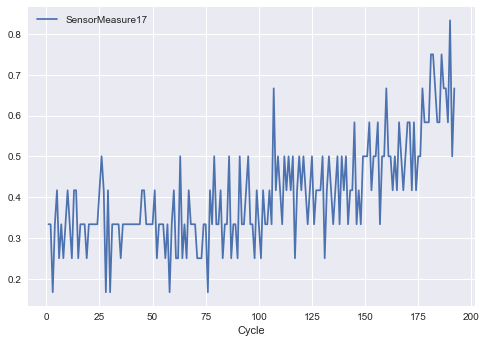

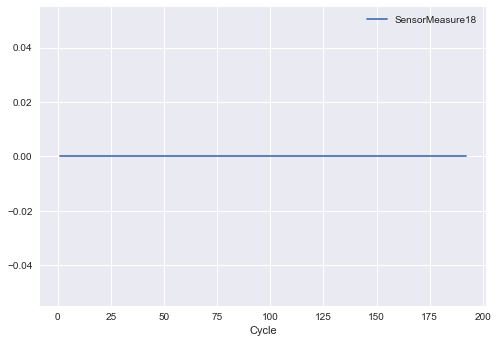

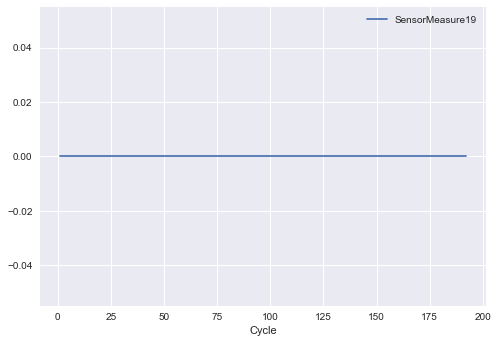

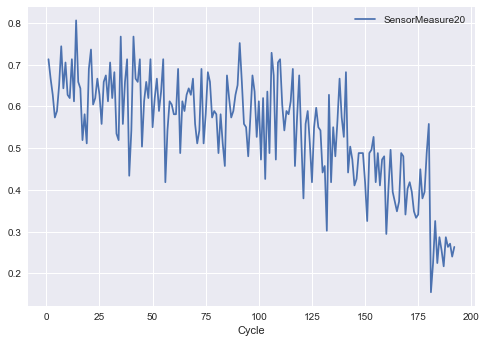

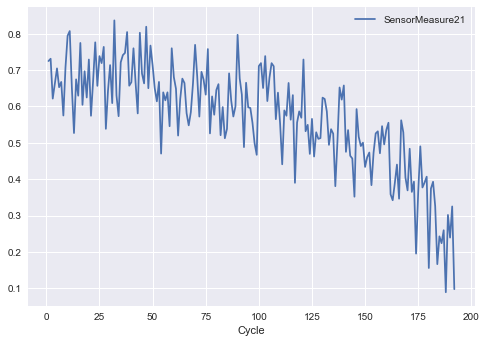

In [77]:
plt.style.use("seaborn")
sensor_count = 21
engine_id = 1
for i in range(1, sensor_count+1):
    y_value = "SensorMeasure" + str(i)
    scaled_df_FD001[scaled_df_FD001["ID"]==engine_id].plot(x="Cycle", y=y_value)

In [78]:
scaled_clean_df_FD001 = scaled_df_FD001.drop(columns=["SensorMeasure1", "SensorMeasure5", "SensorMeasure6", "SensorMeasure10",
                                         "SensorMeasure16", "SensorMeasure18", "SensorMeasure19"])
scaled_clean_df_FD001

,ID,Cycle,RUL,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,...,OpSet2_-0.0003,OpSet2_-0.0002,OpSet2_-0.0001,OpSet2_0.0,OpSet2_0.0001,OpSet2_0.0002,OpSet2_0.0003,OpSet2_0.0004,OpSet2_0.0005,OpSet2_0.0006
0,1,1,191,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,190,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,3,189,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,4,188,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,5,187,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,4,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20627,100,197,3,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20628,100,198,2,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
20629,100,199,1,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [79]:
cycle_counts_FD001 = scaled_clean_df_FD001.groupby("ID")["Cycle"].max().reset_index()
print(type(cycle_counts_FD001))
cycle_counts_FD001

<class 'pandas.core.frame.DataFrame'>


,ID,Cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [80]:
test_data_FD001 = pd.read_csv('test_FD001.txt', sep = ' ', header = None)
test_data_FD001 = test_data_FD001[[f for f in range(0, 26)]]
test_data_FD001.columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]
test_data_FD001

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [81]:
max_cycles_df_test = test_data_FD001.groupby(["ID"], sort=False)["Cycle"].max().reset_index().rename(columns={"Cycle" : "MaxCycleID"})
max_cycles_df_test

,ID,MaxCycleID
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
...,...,...
95,96,97
96,97,134
97,98,121
98,99,97


In [82]:
y_test_rul_FD001 = pd.read_csv('RUL_FD001.txt', header = None)
y_test_rul_FD001.columns = ['Eng_rul']
y_test_rul_FD001['ID'] = max_cycles_df_test['ID']
y_test_rul_FD001

,Eng_rul,ID
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [83]:
max_cycles_df_test['MaxCycleIDAct'] = y_test_rul_FD001['Eng_rul']+ max_cycles_df_test['MaxCycleID']
max_cycles_df_test

,ID,MaxCycleID,MaxCycleIDAct
0,1,31,143
1,2,49,147
2,3,126,195
3,4,106,188
4,5,98,189
...,...,...,...
95,96,97,234
96,97,134,216
97,98,121,180
98,99,97,214


In [84]:
test_df_FD001 = pd.merge(test_data_FD001, max_cycles_df_test, how="inner", on="ID")
test_df_FD001

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,MaxCycleID,MaxCycleIDAct
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,198,218
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,198,218
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,198,218
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,198,218


In [85]:
test_df_FD001["RUL"] = test_df_FD001["MaxCycleIDAct"] - test_df_FD001["Cycle"]
test_df_FD001

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,MaxCycleID,MaxCycleIDAct,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,143,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,198,218,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,198,218,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,198,218,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,198,218,21
